In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('EV_Stat-1.csv')


In [4]:
df.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              31 non-null     int64 
 1   State                                                               31 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   31 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 31 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            31 non-null     int64 
 7   Passenger Cars (Category M1 

In [6]:
df.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

In [7]:




# Handle missing values (e.g., filling missing values with 0 or the mean)
df = df.fillna(0)




In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load your dataset
file_path = 'EV_stat-1.csv'
df = pd.read_csv(file_path)

# Step 2: Inspect column names
print(df.columns)

# Optionally, clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Step 3: Select features and target variable
# Ensure these column names exist in your dataframe
X = df[['State', 
        'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
        'Two Wheelers (Category L2 (CMVR))',
        'Two Wheelers (Max power not exceeding 250 Watts)',
        'Three Wheelers (Category L5 slow speed as per CMVR)',
        'Three Wheelers (Category L5 as per CMVR)',
        'Passenger Cars (Category M1 as per CMVR)',
        'Buses']]

y = df['Total in state']

# Step 4: Preprocess numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

# Step 7: Train the model
model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Index(['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')

Model Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          82       0.00      0.00      0.00       1.0
          98       0.00      0.00      0.00       1.0
         438       0.00      0.00      0.00       1.0
         816       0.00      0.00      0.00       1.0
       31267       0.00      0.00      0.00     

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: Undefi

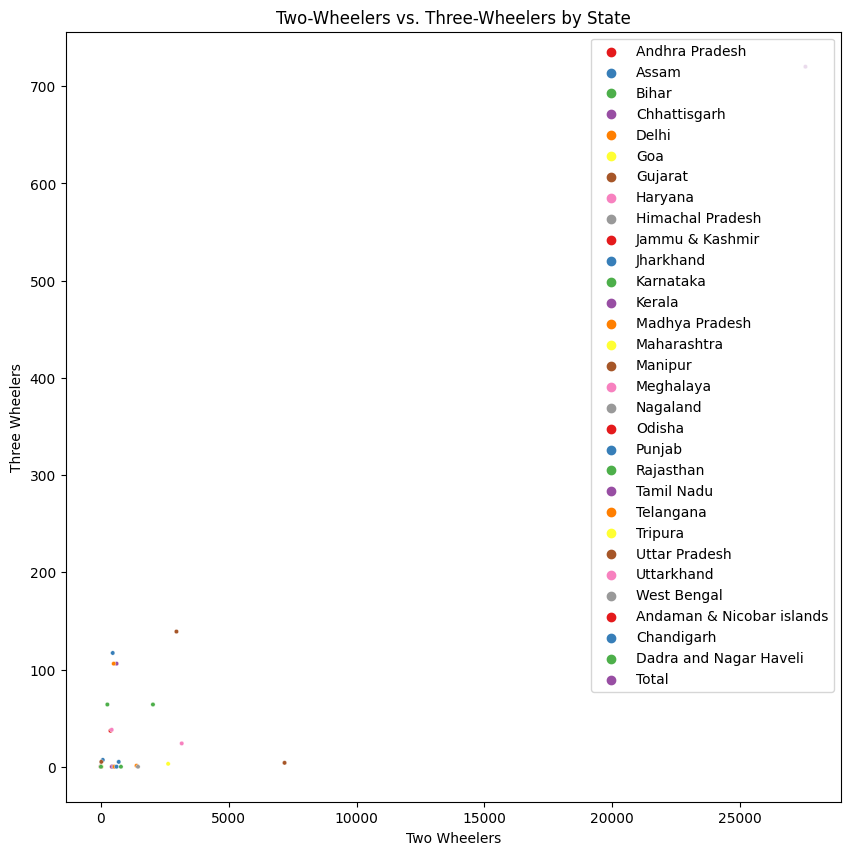

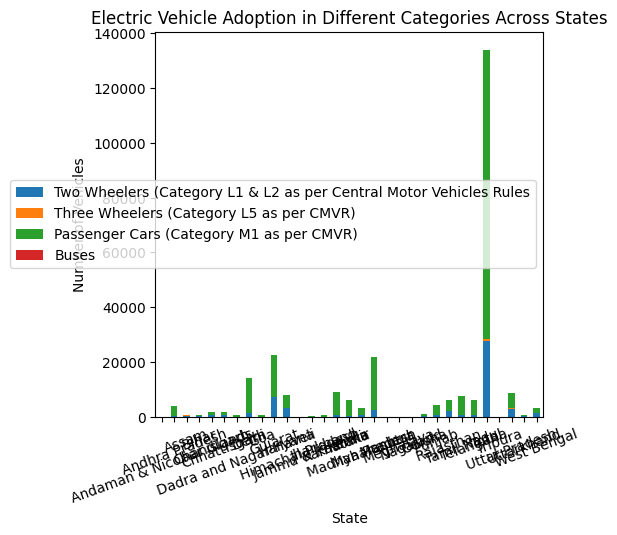

C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\1866399636.py:41: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



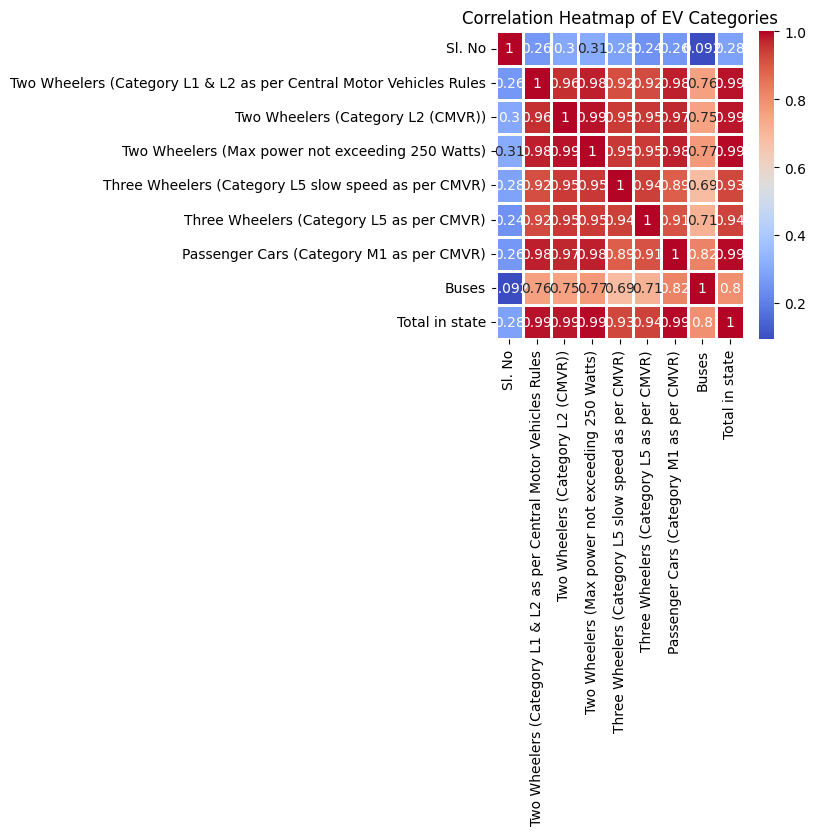

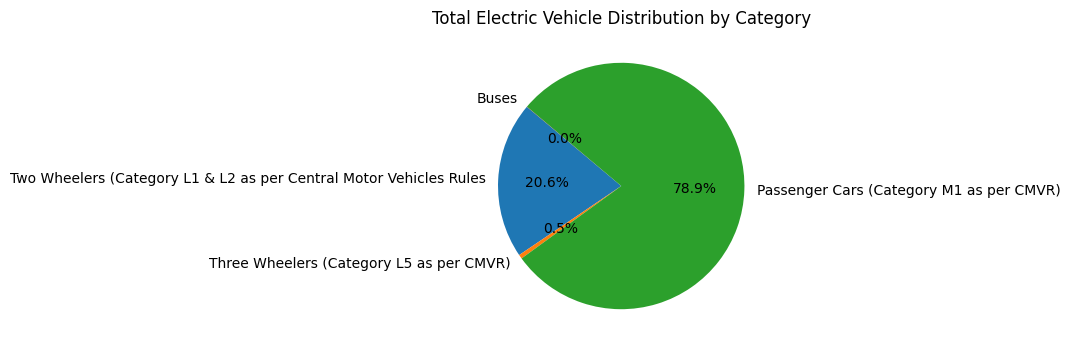

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3.1 Scatter Plot of Two-Wheelers vs. Three-Wheelers colored by State
plt.figure(figsize=(10,10))
sns.scatterplot(
    x='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
    y='Three Wheelers (Category L5 as per CMVR)',
    hue='State',
    data=df,
    palette='Set1',
    s=10
)
plt.title('Two-Wheelers vs. Three-Wheelers by State')
plt.xlabel('Two Wheelers')
plt.ylabel('Three Wheelers')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

# 3.2 Bar Plot of EV Adoption in Different Categories Across States
df_grouped = df.groupby('State').sum().reset_index()
df_grouped.plot(
    x='State',
    y=['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', 
       'Three Wheelers (Category L5 as per CMVR)', 
       'Passenger Cars (Category M1 as per CMVR)', 
       'Buses'],
    kind='bar',
    stacked=True,
    figsize=(5, 5)
)
plt.title('Electric Vehicle Adoption in Different Categories Across States')
plt.xlabel('State')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=20)
plt.show()

# 3.3 Heatmap of Correlations Between Different Categories
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap of EV Categories')
plt.show()

# 3.4 Interactive Scatter Plot using Plotly (Two-Wheelers vs. Passenger Cars)
fig = px.scatter(df, 
                 x='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', 
                 y='Passenger Cars (Category M1 as per CMVR)', 
                 color='State',
                 size='Total in state',
                 hover_name='State',
                 title='Two-Wheelers vs. Passenger Cars by State',
                 labels={
                     'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules': 'Two Wheelers',
                     'Passenger Cars (Category M1 as per CMVR)': 'Passenger Cars'
                 })
fig.show()

# 3.5 Pie Chart of Total EV Distribution by Category
total_ev_per_category = df[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', 
                            'Three Wheelers (Category L5 as per CMVR)', 
                            'Passenger Cars (Category M1 as per CMVR)', 
                            'Buses']].sum()

total_ev_per_category.plot(kind='pie', autopct='%1.1f%%', figsize=(4,4), startangle=140)
plt.title('Total Electric Vehicle Distribution by Category')
plt.ylabel('')
plt.show()